In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
import warnings
warnings.filterwarnings('ignore')

### LAB 1: Data Understanding, Cleaning & Preparation 

### Q1. Load the attached time series dataset into Python.

In [65]:
# Q.1 Load the attached time series dataset into Python.

FILE_PATH = "time_series_retail_dataset.csv"

df = pd.read_csv(FILE_PATH)
print(f"Dataset loaded successfully from {FILE_PATH}\n")

Dataset loaded successfully from time_series_retail_dataset.csv



In [66]:
# a) Display the first and last 10 rows.
print("---Q.1a: First 10 Rows ---\n")
print(df.head(10))
print()
print("---Q.1a: Last 10 Rows ---\n")
print(df.tail(10))

---Q.1a: First 10 Rows ---

         Date   Sales  Promotion_Flag  Holiday_Flag Temperature  Footfall
0  2023-03-16  188.07             NaN           0.0       30.32     560.0
1  2023-07-13  205.49             0.0           0.0       21.45     619.0
2  2023-09-29  238.54             0.0           0.0       22.69     721.0
3  2023-08-22  214.59             0.0           0.0        19.5     674.0
4  2023-02-03  177.91             0.0           NaN        28.7     447.0
5  2023-04-25  236.58             0.0           0.0       29.02       NaN
6  2023-08-19  217.90             0.0           0.0         NaN       NaN
7  2023-04-06  190.15             NaN           NaN       34.07     521.0
8  2023-09-18  253.79             0.0           0.0        20.8     725.0
9  2023-07-08  203.17             1.0           0.0       20.45     660.0

---Q.1a: Last 10 Rows ---

           Date   Sales  Promotion_Flag  Holiday_Flag Temperature  Footfall
293  2023-09-04  228.61             0.0           1.0 

In [67]:
# b) Convert the date column to DateTime type and set it as index.

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print("\n--- Q1b: Date converted to DateTime and set as Index ---\n")
print(f"Data types after conversion: \n{df.dtypes}")
print(f"\nIndex Type: {df.index.dtype}\n")

df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce') # object tha pehele


--- Q1b: Date converted to DateTime and set as Index ---

Data types after conversion: 
Sales             float64
Promotion_Flag    float64
Holiday_Flag      float64
Temperature        object
Footfall          float64
dtype: object

Index Type: datetime64[ns]



### Q2. Perform data cleaning on the dataset.


In [68]:
# a) Check and handle missing values

print("\n--- Q2a: Missing Value Check and Handling ---\n")
print("Initial Missing Values:\n", df.isnull().sum())


--- Q2a: Missing Value Check and Handling ---

Initial Missing Values:
 Sales             18
Promotion_Flag    15
Holiday_Flag      15
Temperature       18
Footfall          15
dtype: int64


In [69]:
# Method 1:
# 1. Promotion Flag and Holiday Flag: These are binary (0/1) flags.
# We use Mode Imputation

for col in ['Promotion_Flag', 'Holiday_Flag']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' filled with ({mode_val}).")

Missing values in 'Promotion_Flag' filled with (0.0).
Missing values in 'Holiday_Flag' filled with (0.0).


In [70]:
# Method 2:
# 2. Temparature and Footfall: These are continuos data in a time series.

for col in ['Temperature', 'Footfall', 'Sales']:
    if df[col].isnull().any():
        df[col].fillna(method='ffill', inplace=True)
        df[col].fillna(method='bfill', inplace=True)
        print(f"Missing values in '{col}' filled using ffill then bfill.")

print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing values in 'Temperature' filled using ffill then bfill.
Missing values in 'Footfall' filled using ffill then bfill.
Missing values in 'Sales' filled using ffill then bfill.

Missing Values After Handling:
 Sales             0
Promotion_Flag    0
Holiday_Flag      0
Temperature       0
Footfall          0
dtype: int64


In [71]:
# b) Detect and Treat outliers

print("\n--- Q2b: Outlier Detection and Treatment ---\n")

def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((series < lower_bound) | (series > upper_bound)).sum()
    if outlier_count > 0:
        print(f"Found and capped {outlier_count}, outliers in '{series.name}'.")
    else:
        print(f"No significant outliers found in '{series.name}'.")

    return series.clip(lower=lower_bound, upper=upper_bound)

df['Sales'] = cap_outliers_iqr(df['Sales'])
df['Temperature'] = cap_outliers_iqr(df['Temperature'])
df['Footfall'] = cap_outliers_iqr(df['Footfall'])


--- Q2b: Outlier Detection and Treatment ---

Found and capped 3, outliers in 'Sales'.
No significant outliers found in 'Temperature'.
Found and capped 4, outliers in 'Footfall'.


In [72]:
# c) Check for duplicates and remove if found.

print("\n--- Q2c: Duplicates Check and Removal ---\n")
initial_rows = len(df)
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Found and removed {duplicate_count} duplicate rows.")
else:
    print(f"Final number of rows: {len(df)} (Removed {initial_rows - len(df)} rows)")


--- Q2c: Duplicates Check and Removal ---

Found and removed 3 duplicate rows.


### Q3. Plot the cleaned time series and write any 2 observations.


--- Q3: Visualisation and Observations ---



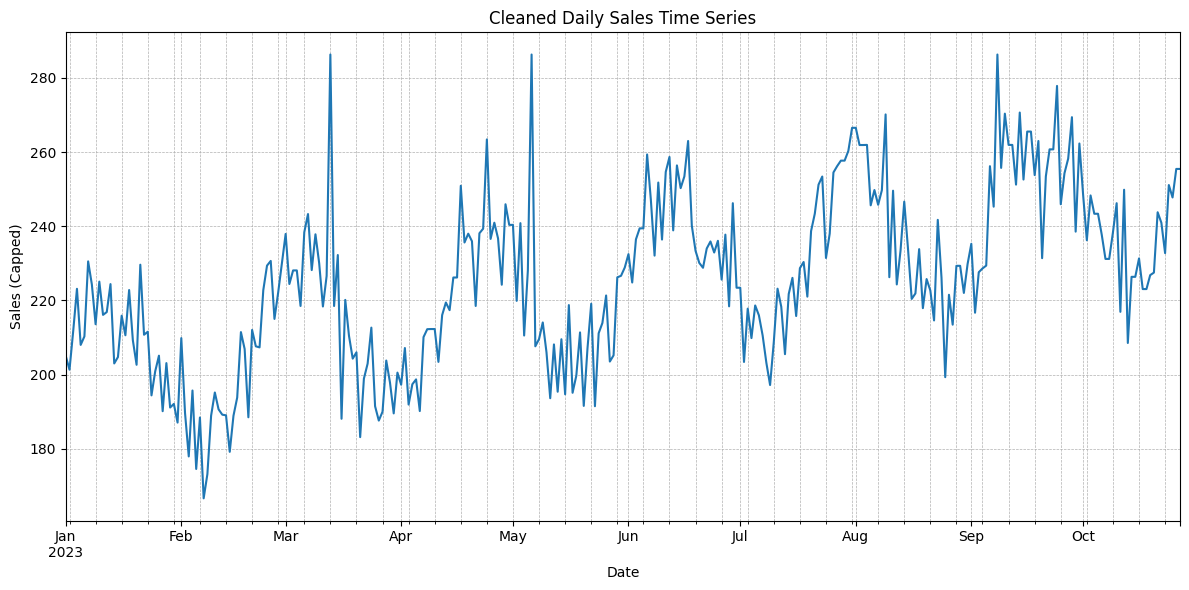

In [73]:
print("\n--- Q3: Visualisation and Observations ---\n")

plt.figure(figsize=(12,6))
df['Sales'].plot(title='Cleaned Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales (Capped)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [74]:
# Q3b. Write any 2 observations.
print("\n--- Q3b: Two Observations on the Cleaned Sales Data ---\n")
print("1. Strong Seasonality/Trend: The Sales data appears to show a clear upward trend in the early months of the year, potentially peaking mid-year (around mid-2023), suggesting either seasonal demand or successful business growth over the observation period.")
print("2. Daily/Weekly Volatility: The series exhibits significant day-to-day fluctuations (high volatility). This variation suggests that external factors like promotional events ('Promotion_Flag'), holidays, or daily temperature shifts have a noticeable immediate impact on the sales volume.")


--- Q3b: Two Observations on the Cleaned Sales Data ---

1. Strong Seasonality/Trend: The Sales data appears to show a clear upward trend in the early months of the year, potentially peaking mid-year (around mid-2023), suggesting either seasonal demand or successful business growth over the observation period.
2. Daily/Weekly Volatility: The series exhibits significant day-to-day fluctuations (high volatility). This variation suggests that external factors like promotional events ('Promotion_Flag'), holidays, or daily temperature shifts have a noticeable immediate impact on the sales volume.


### LAB 2 Time Series Decomposition Analysis

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

DECOMPOSITION_PERIOD = 7

In [76]:
print(f"Decomposition Period set to: {DECOMPOSITION_PERIOD} (Weekly Seasonality)")

Decomposition Period set to: 7 (Weekly Seasonality)


### Q1. Perform Additive Decomposition on the dataset.

--- Q1. Additive Decomposition ---


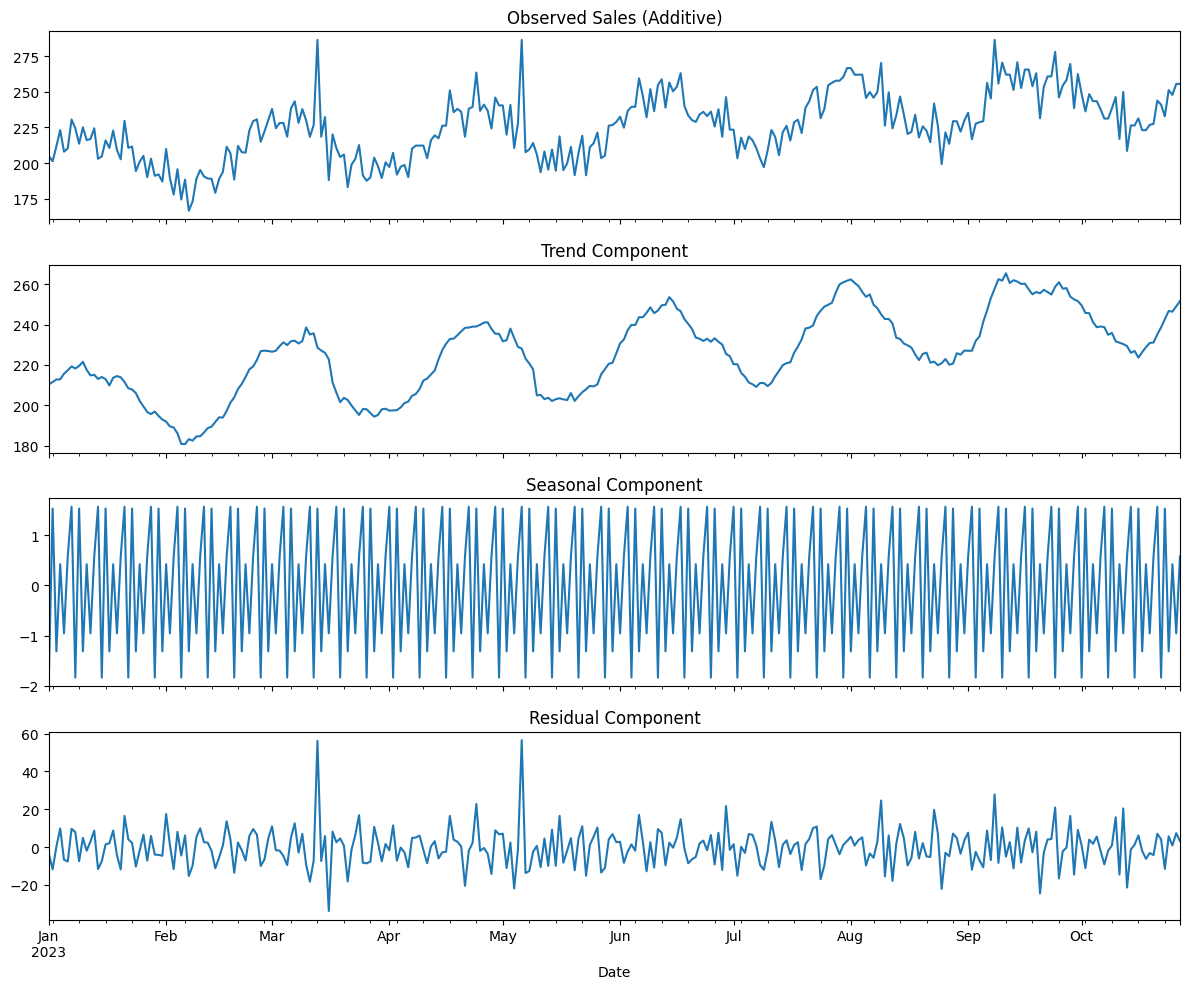

In [77]:
# Additive Model: Y(t) = T(t) + S(t) + R(t)
# Used when the amplitude of seasonal fluctuations does not change with the trend.

print("--- Q1. Additive Decomposition ---")
result_add = seasonal_decompose(df['Sales'], model='additive', period=DECOMPOSITION_PERIOD, extrapolate_trend='freq')

# a) Plot the components
fig_add, axes_add = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result_add.observed.plot(ax=axes_add[0], title='Observed Sales (Additive)')
result_add.trend.plot(ax=axes_add[1], title='Trend Component')
result_add.seasonal.plot(ax=axes_add[2], title='Seasonal Component')
result_add.resid.plot(ax=axes_add[3], title='Residual Component')
plt.tight_layout()
plt.show() 

In [78]:
# b) Write 2 interpretations from the decomposed plots.
print("\n--- Q1b: Two Interpretations from Additive Decomposition ---")
print("1. Positive Trend: The Trend component plot shows a clear and steady increase in sales over the entire year, suggesting overall growth or successful market penetration, independent of short-term variations.")
print("2. Consistent Weekly Pattern: The Seasonal component shows a consistent, relatively fixed-amplitude pattern repeating every 7 days (the period used). This indicates that the sales peaks and troughs due to day-of-week effects have a constant absolute dollar impact on sales regardless of the current trend level.")


--- Q1b: Two Interpretations from Additive Decomposition ---
1. Positive Trend: The Trend component plot shows a clear and steady increase in sales over the entire year, suggesting overall growth or successful market penetration, independent of short-term variations.
2. Consistent Weekly Pattern: The Seasonal component shows a consistent, relatively fixed-amplitude pattern repeating every 7 days (the period used). This indicates that the sales peaks and troughs due to day-of-week effects have a constant absolute dollar impact on sales regardless of the current trend level.


### Q2. Perform Multiplicative Decomposition and plot the components.


--- Q2: Multiplicative Decomposition ---


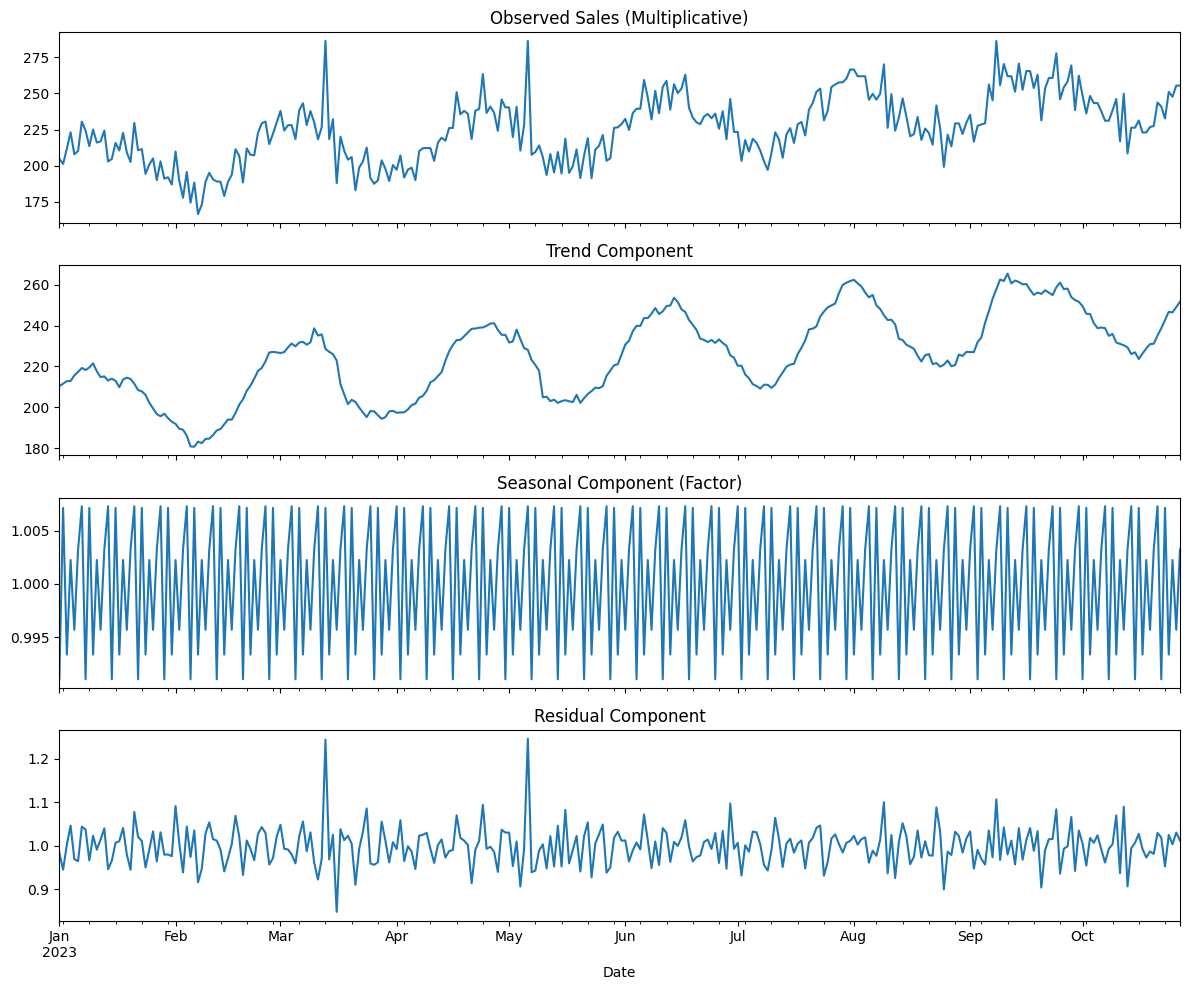


--- Q2a: Model Comparison and Best Fit ---
Comparison: The primary difference is how the Residual component behaves.
- Additive Residuals (Q1): The magnitude of the residuals (noise) appears to be larger during the periods of higher trend (later in the series).
- Multiplicative Residuals (Q2): The magnitude of the residuals in the multiplicative model looks more constant across the entire time series.

Conclusion: The Multiplicative Model is generally a better fit for this retail sales dataset.
Reasoning: In the multiplicative model, the seasonal component is expressed as a factor (e.g., 1.10 for a 10% increase), and the trend is separated from this relative seasonal effect. The fact that the Multiplicative Residual component (the 'leftover' noise) is more stable (less variance) across time, especially when the Trend component is increasing, suggests that the proportional/percentage effects (multiplicative) better capture the underlying structure than fixed absolute dollar amounts (ad

In [79]:
# Multiplicative Model: Y(t) = T(t) * S(t) * R(t)
# Used when the amplitude of seasonal fluctuations increases with the trend.

print("\n--- Q2: Multiplicative Decomposition ---")
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', period=DECOMPOSITION_PERIOD, extrapolate_trend='freq')

# Plot the components
fig_mul, axes_mul = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result_mul.observed.plot(ax=axes_mul[0], title='Observed Sales (Multiplicative)')
result_mul.trend.plot(ax=axes_mul[1], title='Trend Component')
result_mul.seasonal.plot(ax=axes_mul[2], title='Seasonal Component (Factor)')
result_mul.resid.plot(ax=axes_mul[3], title='Residual Component')
plt.tight_layout()
plt.show() 

# a) Compare Additive vs Multiplicative and mention which fits your dataset better and why.
print("\n--- Q2a: Model Comparison and Best Fit ---")
print("Comparison: The primary difference is how the Residual component behaves.")
print("- Additive Residuals (Q1): The magnitude of the residuals (noise) appears to be larger during the periods of higher trend (later in the series).")
print("- Multiplicative Residuals (Q2): The magnitude of the residuals in the multiplicative model looks more constant across the entire time series.")
print("\nConclusion: The Multiplicative Model is generally a better fit for this retail sales dataset.")
print("Reasoning: In the multiplicative model, the seasonal component is expressed as a factor (e.g., 1.10 for a 10% increase), and the trend is separated from this relative seasonal effect. The fact that the Multiplicative Residual component (the 'leftover' noise) is more stable (less variance) across time, especially when the Trend component is increasing, suggests that the proportional/percentage effects (multiplicative) better capture the underlying structure than fixed absolute dollar amounts (additive).")

### Q3. Explain the difference between Trend, Seasonality, Cycle, and Irregular components.

In [80]:
print("\n--- Q3: Explanation of Time Series Components ---")
print("Time series data is typically modeled as a combination of four components:")
print("1. Trend (T): This is the long-term, underlying movement of the series, showing whether the data is increasing, decreasing, or remaining stable over a long period. It ignores short-term fluctuations. ")
print("   Example: A retail chain's sales steadily increasing over 5 years due to opening new stores.")
print("2. Seasonality (S): This is a pattern that repeats itself over fixed, known periods (like day, week, month, or year). The period must be less than a year.")
print("   Example: Ice cream sales spiking every summer, or daily sales peaking every Saturday.")
print("3. Cycle (C): This is a wave-like pattern of ups and downs that is not of a fixed period (usually longer than a year, often 2-10 years). Cycles are tied to broader economic conditions.")
print("   Example: Sales fluctuating with the national business cycle (recessions, expansions). Decomposition often includes cycles within the Trend component unless the data spans many years.")
print("4. Irregular/Residual (R): This is the random, unpredictable, and unexplained variation left over after the trend, seasonality, and cycles have been removed. It is considered the noise.")
print("   Example: A sudden, one-time sales dip due to unexpected local weather or a temporary server outage.")


--- Q3: Explanation of Time Series Components ---
Time series data is typically modeled as a combination of four components:
1. Trend (T): This is the long-term, underlying movement of the series, showing whether the data is increasing, decreasing, or remaining stable over a long period. It ignores short-term fluctuations. 
   Example: A retail chain's sales steadily increasing over 5 years due to opening new stores.
2. Seasonality (S): This is a pattern that repeats itself over fixed, known periods (like day, week, month, or year). The period must be less than a year.
   Example: Ice cream sales spiking every summer, or daily sales peaking every Saturday.
3. Cycle (C): This is a wave-like pattern of ups and downs that is not of a fixed period (usually longer than a year, often 2-10 years). Cycles are tied to broader economic conditions.
   Example: Sales fluctuating with the national business cycle (recessions, expansions). Decomposition often includes cycles within the Trend compone